In [2]:
import os, sys
from dotenv import load_dotenv
import pandas as pd

In [4]:
rpath = os.path.abspath('/home/user/Documents/10/w8/logistic_optimization')

if rpath not in sys.path:
    sys.path.insert(0, rpath)

In [6]:
import utils.utils as util
import scripts.eda as eda

# Completed orders table

In [194]:
path = rpath + "/data/raw/nb.csv"
order = util.load_data(path)

Data loaded successfully.


In [11]:
order

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
...,...,...,...,...,...
536015,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59
536016,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49
536017,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32
536018,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28


In [34]:
order.size

2680100

In [36]:
order.shape

(536020, 5)

In [19]:
order['Trip Destination'].describe()

count                  536020
unique                 147520
top       6.4567308,3.5309404
freq                      844
Name: Trip Destination, dtype: object

In [24]:
order['Trip Start Time'].describe()

count                  534369
unique                 512516
top       2021-12-28 18:16:31
freq                        8
Name: Trip Start Time, dtype: object

In [28]:
order['Trip Origin'].describe()

count                 536020
unique                112142
top       6.6137933,3.357997
freq                     888
Name: Trip Origin, dtype: object

In [32]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


In [221]:
dt = order.info()["Dtype"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536020 entries, 0 to 536019
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Trip ID           536020 non-null  int64 
 1   Trip Origin       536020 non-null  object
 2   Trip Destination  536020 non-null  object
 3   Trip Start Time   534369 non-null  object
 4   Trip End Time     536019 non-null  object
dtypes: int64(1), object(4)
memory usage: 20.4+ MB


TypeError: 'NoneType' object is not subscriptable

In [196]:
order.isnull().sum()

Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64

In [35]:
order.value_counts()

Trip ID  Trip Origin                           Trip Destination                     Trip Start Time      Trip End Time      
391996   6.508813001668548,3.37740316890347    6.650969799999999,3.3450307          2021-07-01 07:28:04  2021-07-01 07:29:37    1
1178247  6.631685399999999,3.3312684           6.5737409,3.4001891                  2021-11-02 15:45:12  2021-11-02 16:19:47    1
1178239  6.552586900000001,3.3260196           6.4510277,3.4388756                  2021-11-02 15:36:53  2021-11-02 16:52:55    1
1178237  6.456547302994947,3.5303088833123866  6.4353832,3.4648662                  2021-11-02 15:10:39  2021-11-02 15:55:10    1
1178230  6.668492400000001,3.2868065           6.618321099999999,3.3100485          2021-11-02 15:45:10  2021-11-02 17:20:15    1
                                                                                                                               ..
788569   6.436372599999999,3.4710931           6.619003400000001,3.3771492          2021-09-02 

In [210]:
def handle_data_type_mismatch(df):
    """
    Handles rows with mismatched data types (None value and other columns numerical).

    Args:
        df (pandas.DataFrame): The DataFrame to handle.

    Returns:
        pandas.DataFrame: The DataFrame with potentially adjusted data types.
    """
    # Iterate through rows
    for index, row in df.iterrows():
        for col in df.columns:
            if pd.isna(row[col]):
                # Check if the remaining columns are numeric
                if all(pd.api.types.is_numeric_dtype(df[other_col]) for other_col in df.columns if other_col != col):
                    row[col] = 0  # Replace with 0 (adjust based on your preference)
        df.loc[index] = row
    return df



In [198]:
exp = eda.ExploratoryDataAnalysis(order)

In [200]:
exp.handle_missing_values('drop')


Missing values per column:
Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64


In [245]:
outliers = exp.detect_outliers("iqr")
outliers

An error occurred during outlier detection: unsupported operand type(s) for -: 'str' and 'str'


,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
536015,False,False,False,False,False
536016,False,False,False,False,False
536017,False,False,False,False,False
536018,False,False,False,False,False


In [205]:
data = exp.treat_outliers(outliers)
data


Treating outliers by removal.


,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36
...,...,...,...,...,...
536015,1637696,"6.448218499999999,3.4772075","6.437787399999999,3.481670199999999",2021-12-30 20:35:06,2021-12-30 21:02:59
536016,1637702,"6.442320899999999,3.4736868","6.436589333407897,3.5559738188407835",2021-12-30 20:48:13,2021-12-30 21:43:49
536017,1637704,"6.4281982,3.492248","6.448088500000001,3.4775747",2021-12-30 20:51:45,2021-12-30 21:41:32
536018,1637705,"6.5869296,3.3632966","6.637906899999999,3.3339515",2021-12-30 20:48:50,2021-12-30 21:08:28


In [273]:
data.isnull().sum()

Trip ID             0
Trip Origin         0
Trip Destination    0
Trip Start Time     0
Trip End Time       0
dtype: int64

In [44]:
exp.value_counts_summary("Trip Origin").head(20)

,Trip Origin,count
0,"6.6137933,3.357997",888
1,"6.462727,3.55679",668
2,"6.4293597,3.4334968",576
3,"6.4286308,3.5155123",544
4,"6.4431192,3.4814372",543
5,"6.4440858,3.5080498",538
6,"6.622069799999999,3.383825",538
7,"6.5952581,3.3521434",522
8,"6.452345299999999,3.527539",520
9,"6.4372969,3.460993199999999",514


In [46]:
exp.value_counts_summary("Trip Destination").head(20)

,Trip Destination,count
0,"6.4567308,3.5309404",844
1,"6.448969300000001,3.5231794",794
2,"6.497595,3.383098",735
3,"6.5837939,3.333551899999999",732
4,"6.452345299999999,3.527539",727
5,"6.455619200000001,3.5117174",565
6,"6.442932799999999,3.5301368",556
7,"6.4452713,3.5071693",547
8,"6.4239727,3.4892523",486
9,"6.4476691,3.5334371",485


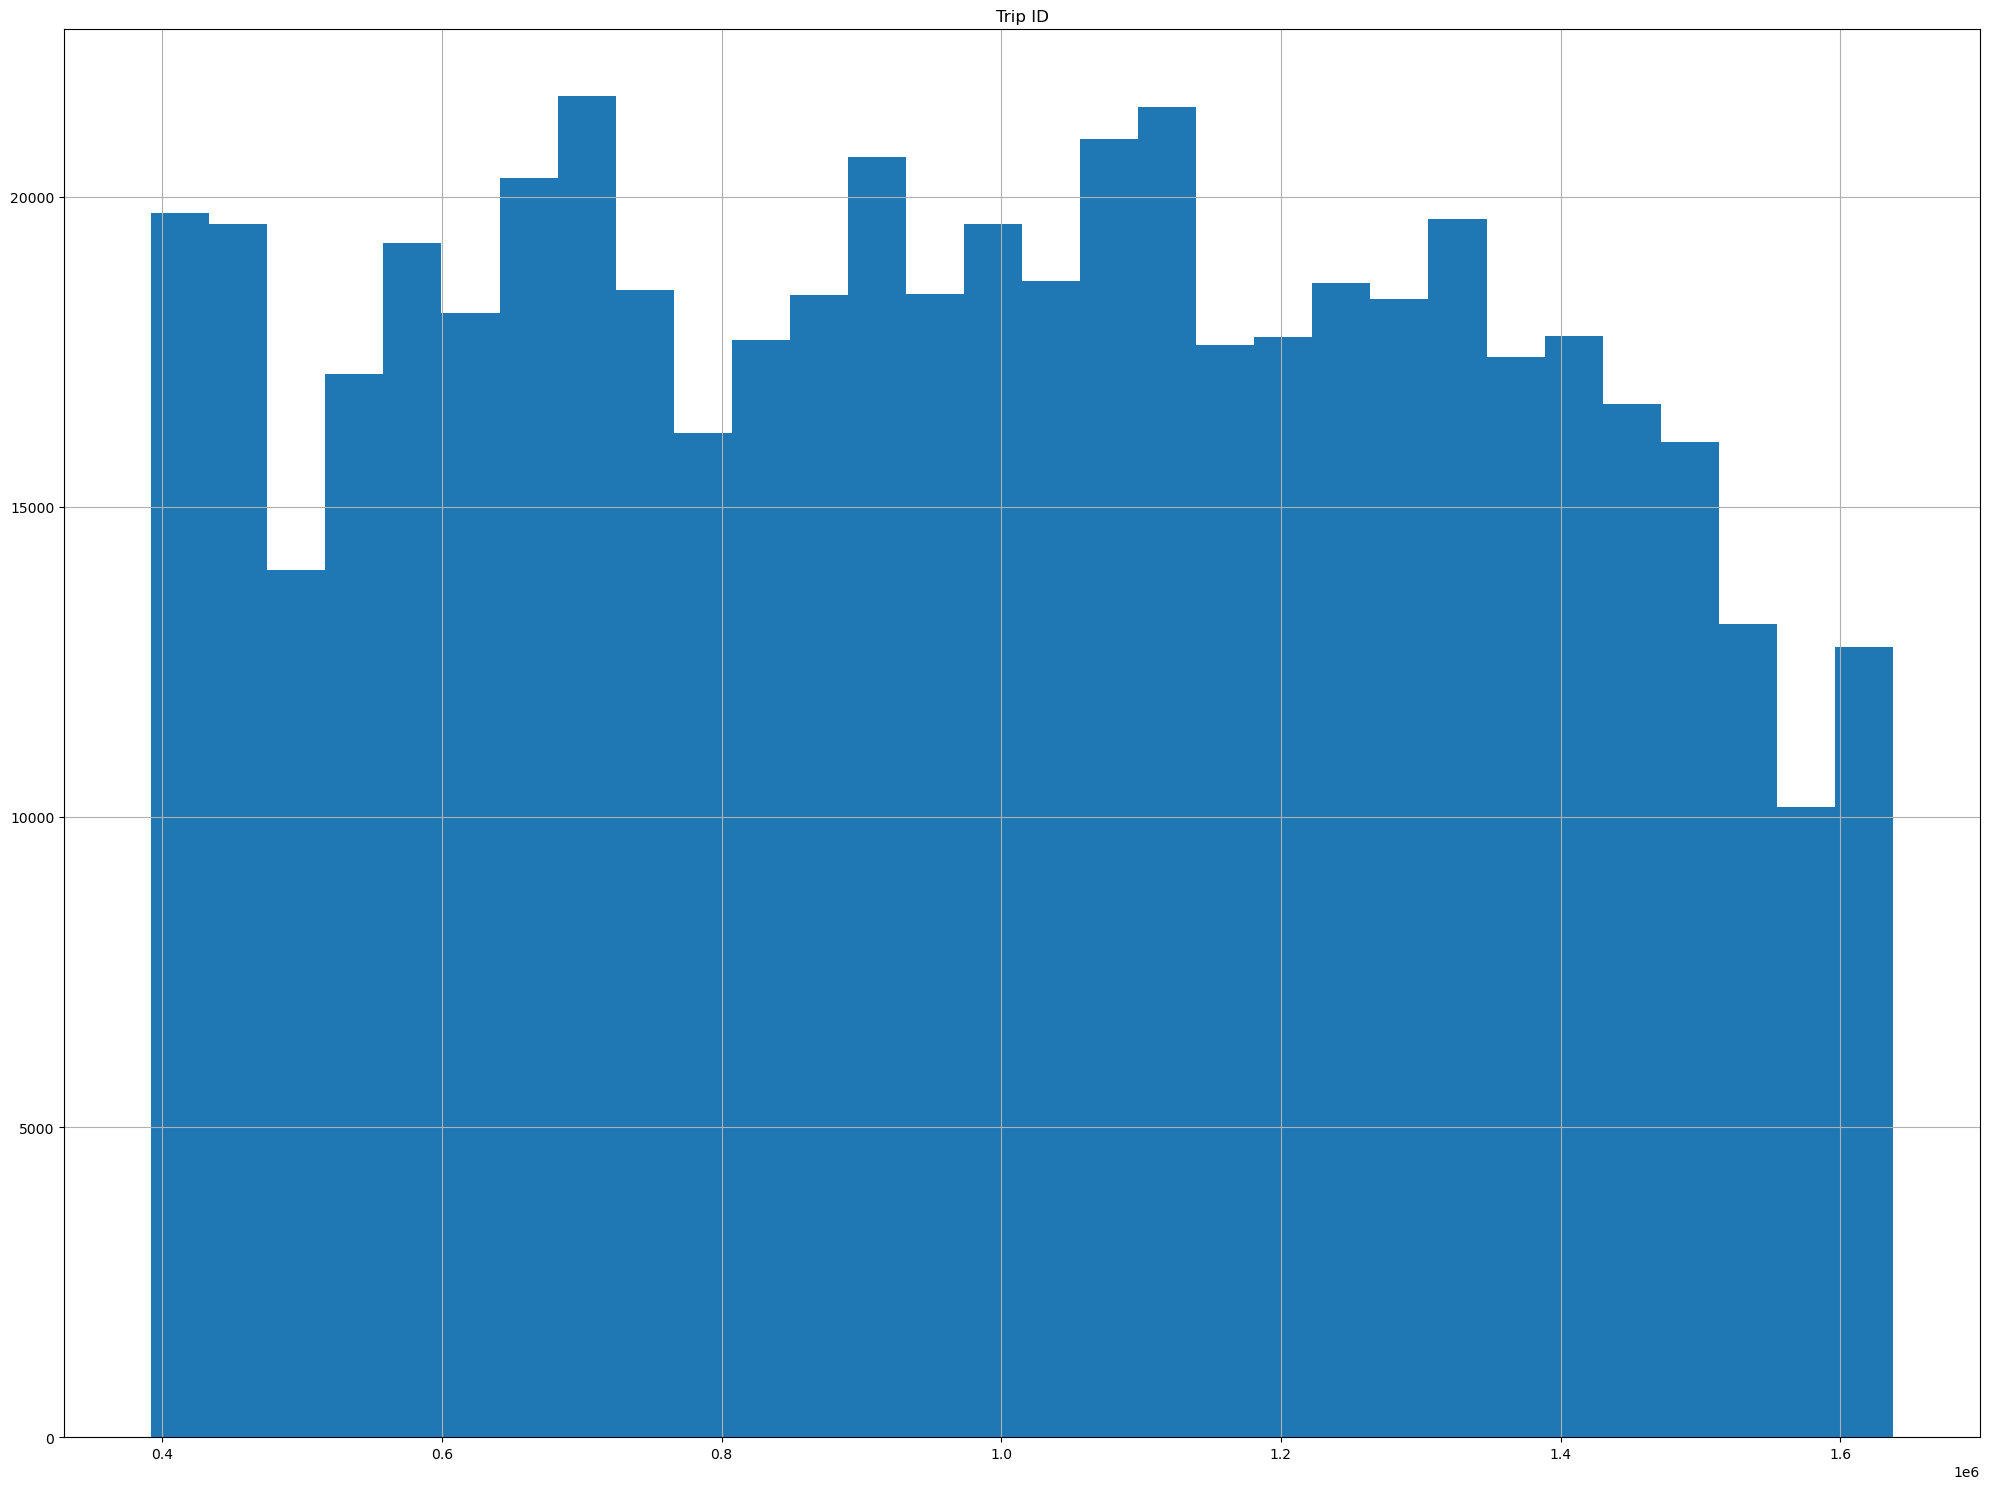


Generating Box plots:


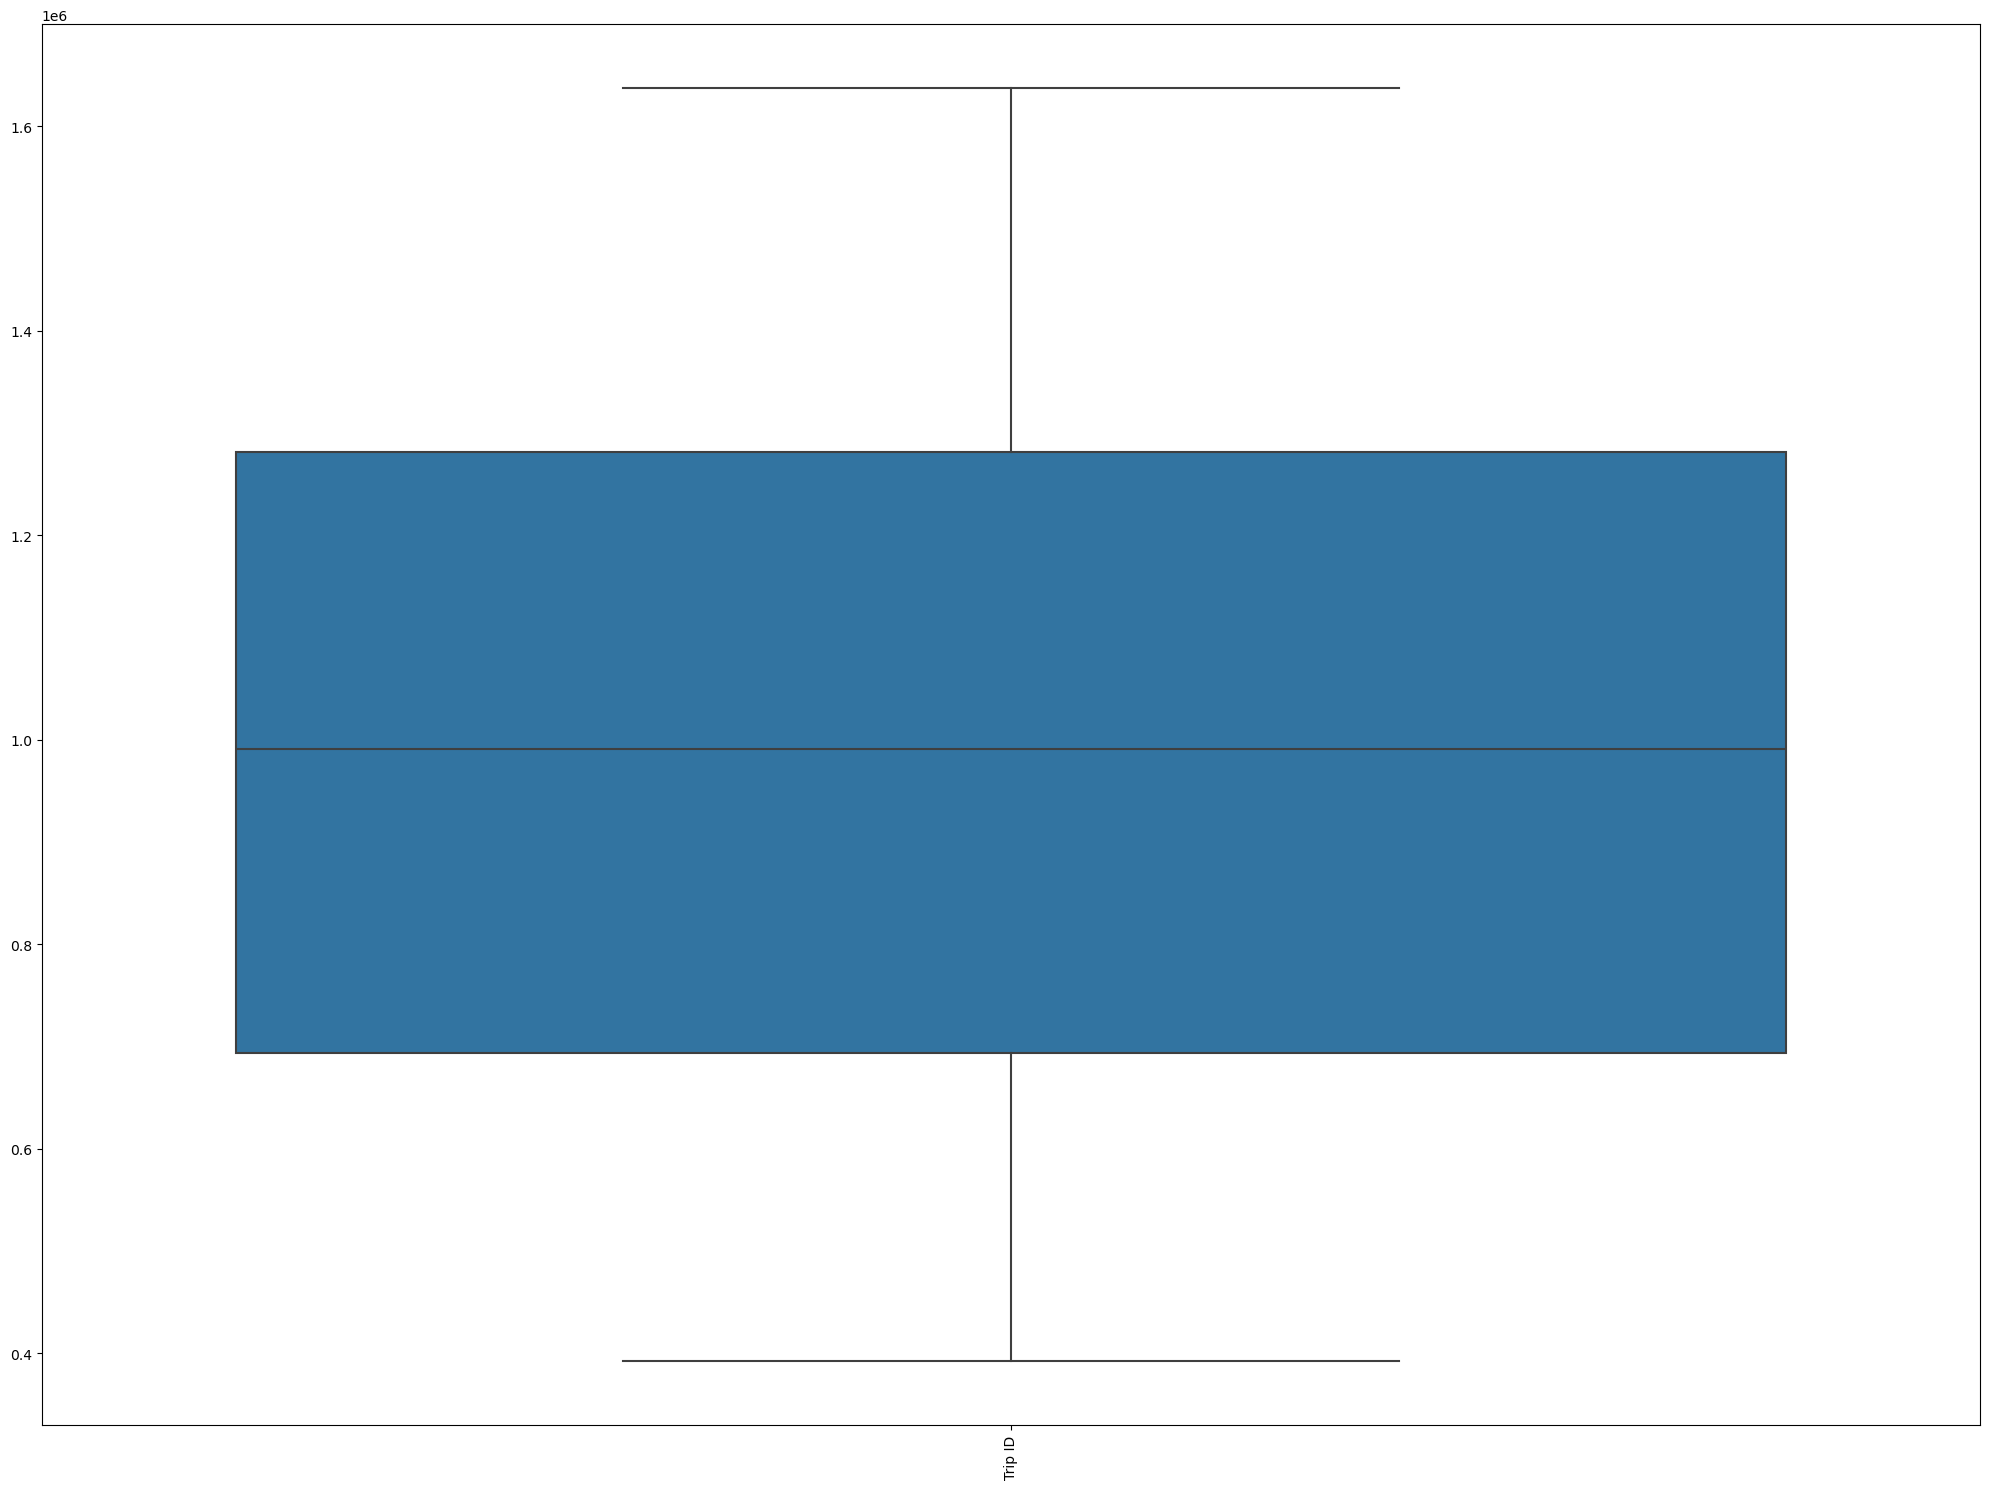

(array([[<Axes: title={'center': 'Trip ID'}>]], dtype=object), <Axes: >)

In [87]:
exp.univariate_analysis()


Generating Pair plot:


/home/user/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


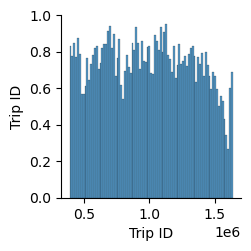


Generating Correlation matrix heatmap:
An error occurred during bivariate analysis: could not convert string to float: '6.508813001668548,3.37740316890347'


(None, None)

In [89]:
exp.bivariate_analysis()

In [53]:
univariate_analysis()

An error occurred during univariate analysis: hist method requires numerical or datetime columns, nothing to plot.


(None, None)

In [64]:
timestamp_list = data['Trip Start Time'].tolist()

# Get the top timestamp (earliest or latest)
earliest_timestamp = data['Trip Start Time'].min()
latest_timestamp = data['Trip Start Time'].max()

TypeError: '<=' not supported between instances of 'str' and 'float'

In [59]:
path = rpath + "/data/processed/order.csv"
util.save_to_csv(data, path)

Data saved to /home/user/Documents/10/w8/logistic_optimization/data/processed/order.csv


'/home/user/Documents/10/w8/logistic_optimization/data/processed/order.csv'

# Delivery requests by clients (completed and unfulfilled) 


In [8]:
path = rpath + "/data/raw/driver_locations_during_request.csv"
data1 = util.load_data(path)

Data loaded successfully.


In [9]:
data1

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN
...,...,...,...,...,...,...,...,...
1557735,1557736,517948,243774,rejected,6.469036,3.566877,NaN,NaN
1557736,1557737,517948,245447,rejected,6.425431,3.527358,NaN,NaN
1557737,1557738,517948,239866,rejected,6.440013,3.525378,NaN,NaN
1557738,1557739,517948,243774,rejected,6.469036,3.566877,NaN,NaN


In [14]:
dt = data1.info()["Dtype"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


TypeError: 'NoneType' object is not subscriptable

In [16]:
data1.isnull().sum()

id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64

In [12]:
data1.describe()

,id,order_id,driver_id,lat,lng,created_at,updated_at
count,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,0.0,0.0
mean,7.788705e+05,4.191833e+05,2.341505e+05,6.536031e+00,3.378877e+00,NaN,NaN
std,4.496809e+05,1.444531e+04,2.270475e+04,5.998150e-02,5.333432e-02,NaN,NaN
min,1.000000e+00,3.920010e+05,1.219810e+05,6.409333e+00,3.076561e+00,NaN,NaN
25%,3.894358e+05,4.067650e+05,2.429970e+05,6.498694e+00,3.348810e+00,NaN,NaN
50%,7.788705e+05,4.216870e+05,2.435890e+05,6.544247e+00,3.363504e+00,NaN,NaN
75%,1.168305e+06,4.293130e+05,2.440560e+05,6.593276e+00,3.385177e+00,NaN,NaN
max,1.557740e+06,5.179480e+05,2.478770e+05,7.702536e+00,8.515414e+00,NaN,NaN


In [20]:
data1.shape 

(1557740, 8)

In [22]:
data1.size

12461920

In [258]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1557740 entries, 0 to 1557739
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   id             1557740 non-null  int64  
 1   order_id       1557740 non-null  int64  
 2   driver_id      1557740 non-null  int64  
 3   driver_action  1557740 non-null  object 
 4   lat            1557740 non-null  float64
 5   lng            1557740 non-null  float64
 6   created_at     0 non-null        float64
 7   updated_at     0 non-null        float64
dtypes: float64(4), int64(3), object(1)
memory usage: 95.1+ MB


In [26]:
data1['driver_action'].describe()

count      1557740
unique           2
top       rejected
freq       1531837
Name: driver_action, dtype: object

In [30]:
accepted_count = data1['driver_action'].value_counts().get('accepted', 0)
rejected_count = data1['driver_action'].value_counts().get('rejected', 0)
accepted_count,rejected_count

(25903, 1531837)

In [34]:
grouped = data1.groupby('driver_id')['driver_action'].value_counts().unstack(fill_value=0)
grouped['total'] = grouped.sum(axis=1)
grouped

driver_action,accepted,rejected,total
driver_id,,,
121981,16,2133,2149
171091,19,2696,2715
171092,11,3619,3630
171098,20,1237,1257
171101,26,463,489
...,...,...,...
247508,0,1,1
247709,0,2,2
247794,0,1,1


In [260]:
exp2.handle_missing_values('drop')


Missing values per column:
id                     0
order_id               0
driver_id              0
driver_action          0
lat                    0
lng                    0
created_at       1557740
updated_at       1557740
dtype: int64


In [259]:
exp2 = eda.ExploratoryDataAnalysis(data1)

In [267]:
outliers2 = exp2.detect_outliers("iqr")
outliers2


Outliers detected using IQR method:
id               0
order_id         0
driver_id        0
driver_action    0
lat              0
lng              0
created_at       0
updated_at       0
dtype: int64


,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at



Treating outliers by removal.


,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at


In [271]:
data2

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at


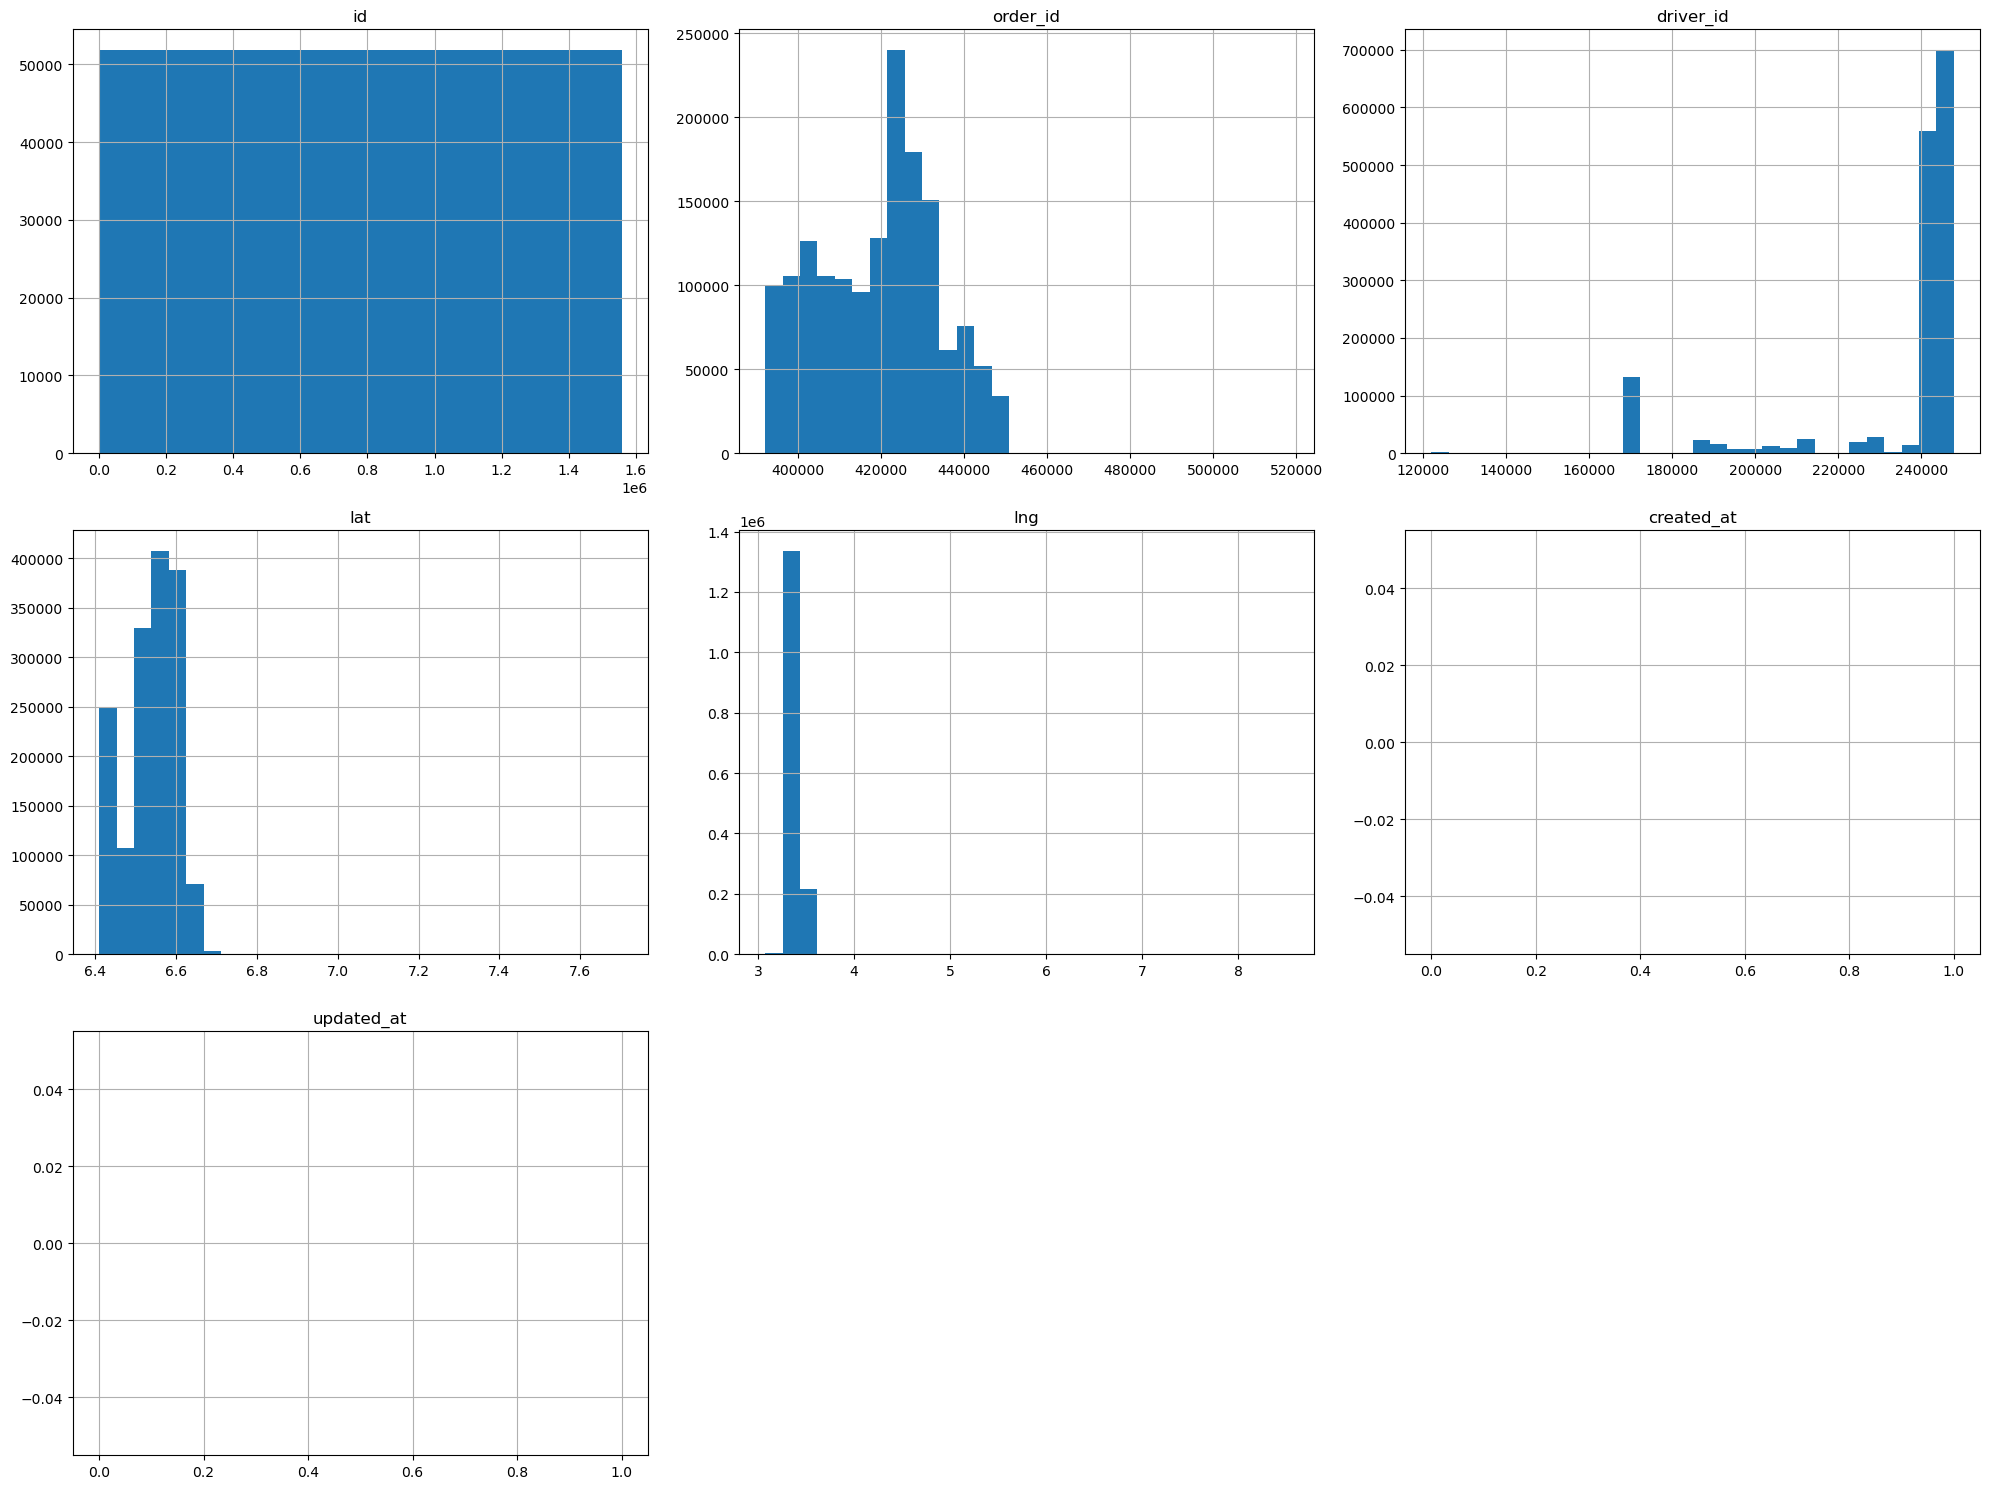


Generating Box plots:


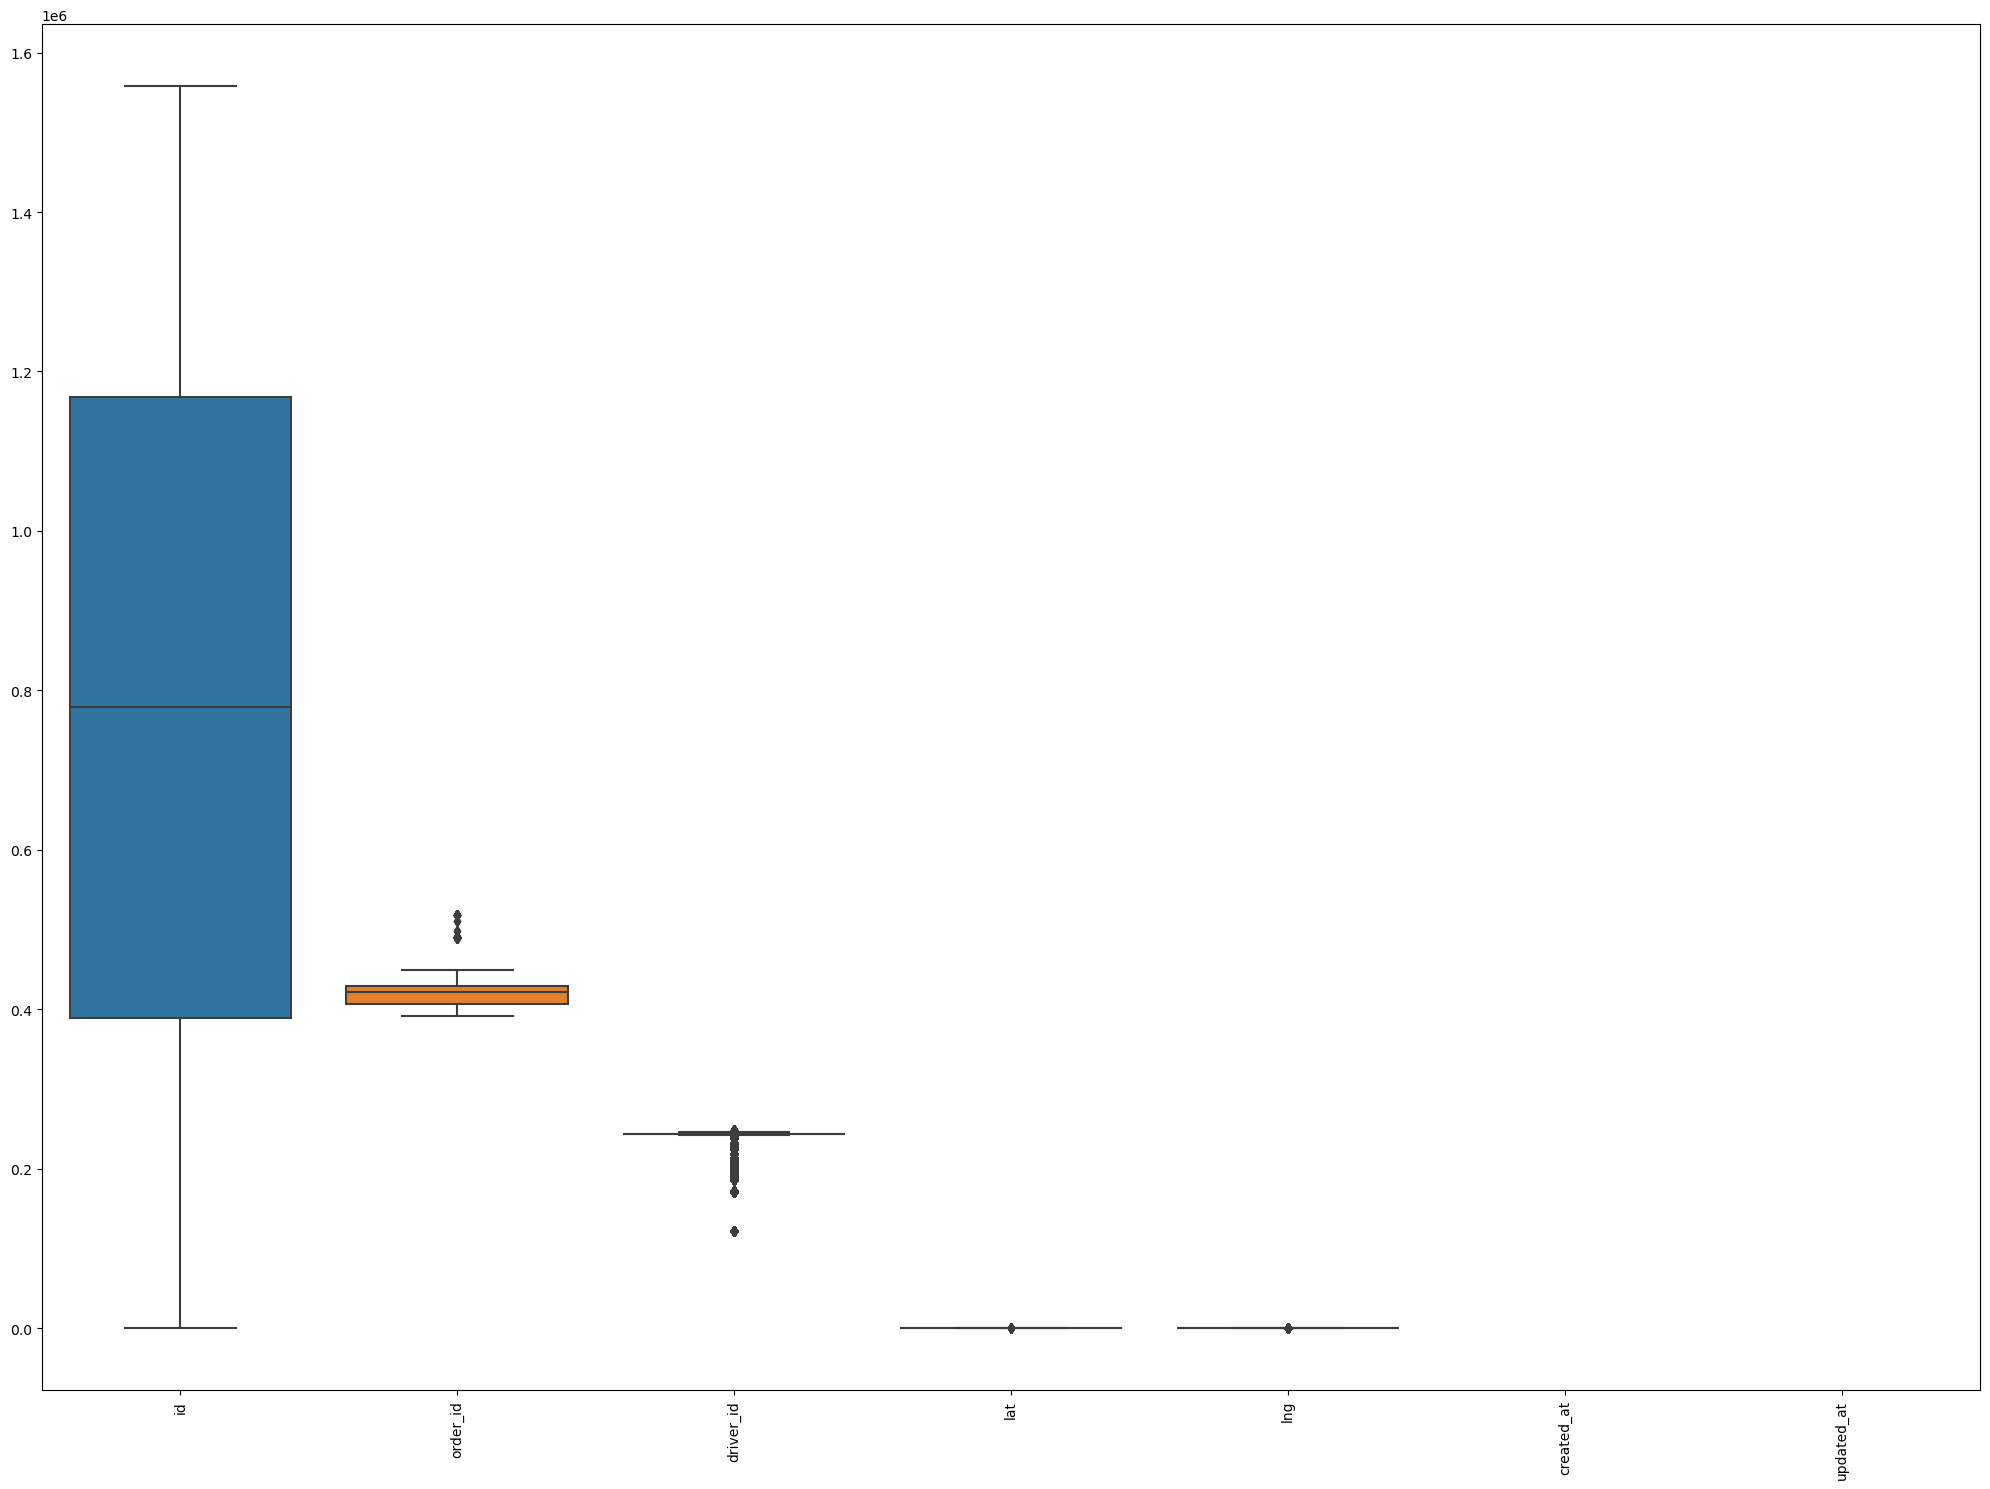

(array([[<Axes: title={'center': 'id'}>,
         <Axes: title={'center': 'order_id'}>,
         <Axes: title={'center': 'driver_id'}>],
        [<Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lng'}>,
         <Axes: title={'center': 'created_at'}>],
        [<Axes: title={'center': 'updated_at'}>, <Axes: >, <Axes: >]],
       dtype=object),
 <Axes: >)

In [85]:
 exp2.univariate_analysis()

In [ ]:
exp2.bivariate_analysis()

In [59]:
path = rpath + "/data/processed/driver_locations_during_request.csv"
util.save_to_csv(outliers, path)

Data saved to /home/user/Documents/10/w8/logistic_optimization/data/processed/driver_locations_during_request.csv


'/home/user/Documents/10/w8/logistic_optimization/data/processed/driver_locations_during_request.csv'